In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_df = pd.read_csv('train_2016_v2.csv', parse_dates=['transactiondate'], low_memory=False)
test_df = pd.read_csv('sample_submission.csv', low_memory=False)
df = pd.read_csv('properties_2016.csv', low_memory=False)
test_df['parcelid'] = test_df['ParcelId']

In [6]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [9]:
def add_date_features(df):
    df['transcation_year'] = df['transactiondate'].dt.year
    df['transcation_month'] = df['transactiondate'].dt.month
    df['transcation_day'] = df['transactiondate'].dt.day
    df['transcation_quarter'] = df['transactiondate'].dt.quarter
    df = df.drop(['transactiondate'], axis=1)
    return df

In [8]:
def clean_columns(df):
    df.columns = map(str.lower, df.columns)
    id_col = [col for col in df.columns if 'id' in col]
    df = df.drop(id_col, axis=1)
    return df

In [63]:
def null_plot(df):
    x = np.arange(len(df.index))
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.bar(x, df.values)
    plt.grid()
    plt.xticks(x, df.index, rotation='vertical', size=14)
    plt.show()

In [107]:
def filter_outliers(df, col):
    upper_lower = df[col].quantile([0.25, 0.75], interpolation='midpoint')
    diff = upper_lower.loc[0.75] - upper_lower.loc[0.25]
    upper = upper_lower.loc[0.75] + 1.5 * diff
    lower = upper_lower.loc[0.25] - 1.5 * diff
    df = df[(df[col] < upper) & (df[col] > lower)]
    return df

In [10]:
train_df = add_date_features(train_df)
train_df = train_df.merge(df, how='left', on='parcelid')
test_df = test_df.merge(df, how='left', on='parcelid')

In [52]:
len(test_df)

2985217

In [86]:
df = clean_columns(train_df)

### Outliers

In [87]:
df['logerror'].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [106]:
aa = pd.DataFrame({'a': [10,11,11,11,12,12,13,14,14,15,17,22.0]})

a    19.75
dtype: float64
a    5.75
dtype: float64


In [109]:
bb = filter_outliers(aa, 'a')
bb

,a
0,10.0
1,11.0
2,11.0
3,11.0
4,12.0
5,12.0
6,13.0
7,14.0
8,14.0
9,15.0


In [24]:
nulls = df.isnull().sum()
nulls

logerror                            0
transcation_year                    0
transcation_month                   0
transcation_day                     0
transcation_quarter                 0
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
calculatedbathnbr                1182
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
latitude                            0
longitude                           0
lotsizesquarefeet               10150
poolcnt                         72374
poolsizesum 

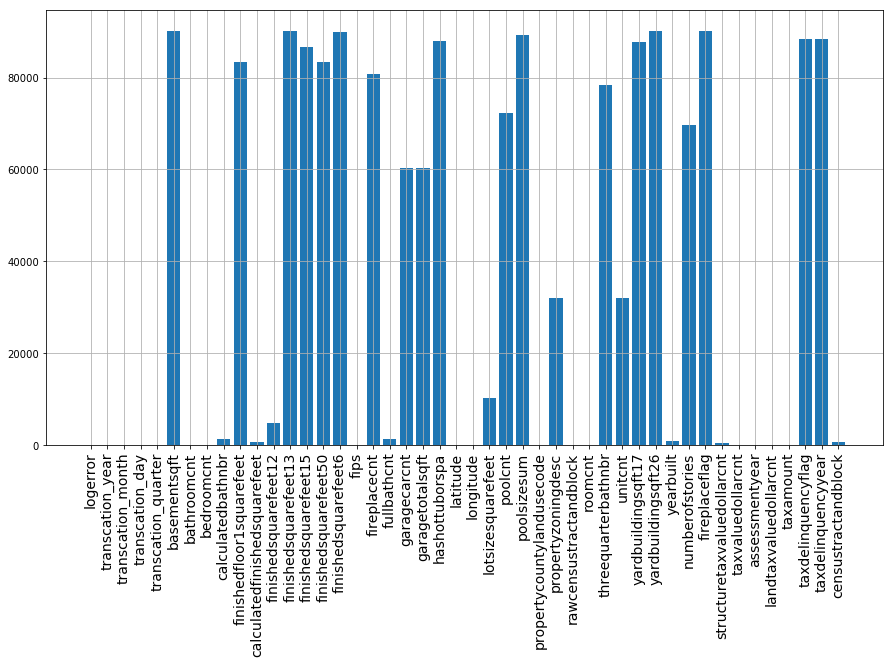

In [65]:
nulls = df.isnull().sum()
null_plot(nulls)

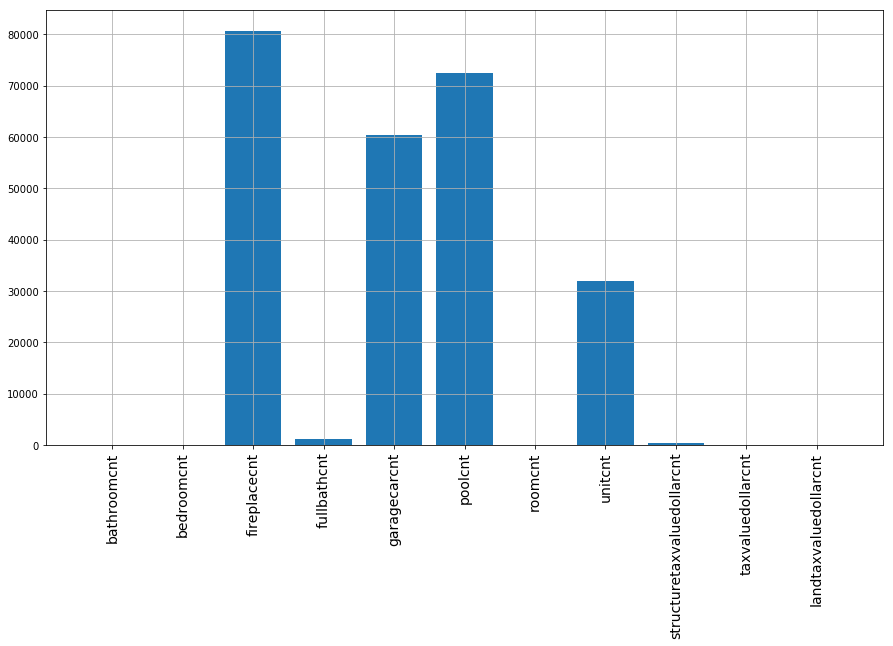

In [68]:
count_df = df[[col for col in df.columns if 'cnt' in col]]
null_plot(count_df.isnull().sum())

In [81]:
count_df['garagecarcnt'].describe()

count    29937.000000
mean         1.812005
std          0.608761
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         24.000000
Name: garagecarcnt, dtype: float64

In [79]:
room_cnt = count_df['bathroomcnt'] + count_df['bedroomcnt']
room_cnt.describe()

count    90275.000000
mean         5.311343
std          1.961295
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         26.000000
dtype: float64

In [83]:
count_df.loc[count_df['poolcnt'].isnull(), 'poolcnt'] = 0

/home/ksooklall/anaconda3/envs/aind-dog/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/ksooklall/anaconda3/envs/aind-dog/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
count_df['structuretaxvaluedollarcnt'] = count_df['structuretaxvaluedollarcnt'].fillna(count_df['structuretaxvaluedollarcnt'].min())

In [ ]:
use_count_columns = ['bathroomcnt', 'bedroomcnt', 'fullbathcnt', 'poolcnt', 'roomcnt', 'structuretaxvaluedollarcnt']